In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk

In [32]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection.tsv to SMSSpamCollection (1).tsv


In [0]:
import io
data = pd.read_table(io.StringIO(uploaded['SMSSpamCollection.tsv'].decode('utf-8')),names=['label','text'])

In [163]:
data.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()#Lower Text
    text = re.sub(REPLACE_BY_SPACE_RE,' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,'',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)# delete stopwords from text
    return text

In [0]:
#X_train,X_test,Y_train,Y_test=train_test_split(data['text'],data['label'],test_size=0.2,random_state=42)

In [0]:
#X_train.head(5)

In [0]:
#Y_train.head(5)

In [0]:
X=[text_prepare(x) for x in data['text']]
#X_test=[text_prepare(x) for x in X_test]

In [132]:
X[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate tcs apply 08452810075over18s']

In [133]:
input_text=[]
input_character=[]
input_text=X
input_text[0:3]


['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate tcs apply 08452810075over18s']

In [0]:
for text in input_text:
  #print(text)
  for char in text:
    #print(char)
    if char not in input_character:
      input_character.append(char)

In [135]:
input_character[0:9]

['g', 'o', ' ', 'j', 'u', 'r', 'n', 'p', 'i']

In [136]:
input_character=sorted(list(input_character))
max_text_length=max([len(txt) for txt in input_text])
num_encoder_token=len(input_character)
max_text_length

516

In [0]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_character)])

In [138]:
input_token_index['g']

20

In [139]:
row=len(input_text)
row

5572

In [140]:
bow=np.zeros((row,num_encoder_token))
bow.shape

(5572, 40)

In [0]:
for i, text in enumerate(input_text):
  for char in text:
    bow[i,input_token_index[char]]=1;

In [142]:
bow[0,0]

1.0

In [0]:
class1=[]
binary=[]
for i in data['label']:
  class1.append(i)
length_class1=len(class1)
for i in range(0,length_class1):
  if(class1[i]=='ham'):
    binary.append(0)
  else:
    binary.append(1)

In [144]:
bow

array([[1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [0]:
w=pd.DataFrame(data=bow)

In [0]:
q=pd.DataFrame(data=binary)

In [151]:
X=w
Y=q
X.shape

(5572, 40)

In [164]:
X_train,X_test=train_test_split(X,test_size=0.2,random_state=42)
Y_train,Y_test=train_test_split(Y,test_size=0.2,random_state=42)

#X_train=pd.DataFrame(data=X_train,index=[i for i in range(4457)])
#Y_train=pd.DataFrame(data=Y_train,index=[i for i in range(4457)])
#X_test=pd.DataFrame(data=X_test,index=[i for i in range(1115)])
#Y_test=pd.DataFrame(data=Y_test,index=[i for i in range(1115)])
X_train.head(5)



,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1978,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4086,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [155]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [157]:

ypredicted=pd.DataFrame(data=y_pred)
ypredicted.head(5)

,0
0,1
1,1
2,0
3,0
4,0


In [158]:
Y_test.head(5)

,0
3245,0
944,0
1044,0
2484,0
812,0


In [159]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[852, 114],
       [  4, 145]])

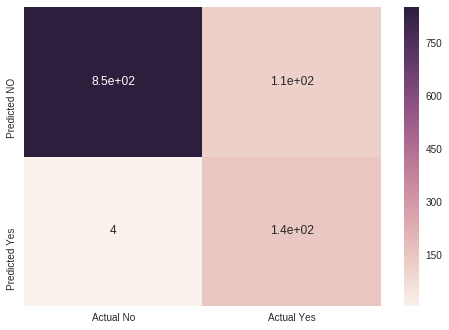

In [160]:
import seaborn as sn
df_cm=pd.DataFrame(data=cm,index=['Predicted NO','Predicted Yes'],columns=['Actual No','Actual Yes'])
sn.heatmap(df_cm, annot=True)